# Read KRF files
Kick off 2025-10-31

## Initial settings

In [124]:
import numpy as np
from pathlib import Path
import pandas as pd
import geopandas as gpd
# import shapely
import rasterio
# import rasterio.mask

import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

## Read KRF files from source

In [42]:
dir_krf = '/Users/hkang/damask/gis/assets/KRF-v3'

path_node = Path(dir_krf, 'KRF_ver3_NODE.shp')
path_line = Path(dir_krf, 'KRF_ver3_LINE.shp')
path_poly = Path(dir_krf, 'KRF_ver3_CATCHMENt.shp')

In [43]:
gdf_node = gpd.read_file(path_node)
gdf_node.head(3)

,OBJECTID,NODE_ID,NODE_DID,NODE_X,NODE_Y,WGM_ID,WGM_NM,WTM_ID,WTM_NM,WAM_ID,WAM_NM,DAM_NM,BO_NM,LU_RCH_ID,LU_RCH_DID,RU_RCH_ID,RU_RCH_DID,LD_RCH_ID,LD_RCH_DID,RD_RCH_ID,RD_RCH_DID,NODE_SN,NODE_DIV,RCH_NUM,S_FLAG,E_FLAG,C_FLAG,DAM_FLAG,BO_FLAG,WGM_FLAG,WTM_FLAG,WAM_FLAG,SB_FLAG,R_FLAG,FLAG_ID,geometry
0,1,60020106,6002010600,126.379,33.484,None,None,None,None,None,None,None,None,60020103,6002010300,None,None,None,None,None,None,06,00,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0000001,POINT (126.37909 33.4842)
1,2,60020104,6002010400,126.397,33.484,None,None,None,None,None,None,None,None,60020102,6002010200,None,None,None,None,None,None,04,00,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0000001,POINT (126.39736 33.48412)
2,3,60020102,6002010200,126.403,33.486,None,None,None,None,None,None,None,None,60020101,6002010100,None,None,None,None,None,None,02,00,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0000001,POINT (126.40295 33.48579)


In [44]:
gdf_line = gpd.read_file(path_line)
gdf_line.head(3)

,OBJECTID,RCH_ID,RCH_DID,BRU_X,BRU_Y,BLL_X,BLL_Y,Shape_Leng,INODE_ID,INODE_DID,ONODE_ID,ONODE_DID,U_DIR,LU_RCH_ID,LU_RCH_DID,RU_RCH_ID,RU_RCH_DID,DI_DIR,DI_RCH_ID,DI_RCH_DID,D_DIR,LD_RCH_ID,LD_RCH_DID,RD_RCH_ID,RD_RCH_DID,CAT_ID,CAT_DID,RIV_ID,RIV_NM,RCH_SN,RCH_DIV,GEO_TRIB,RCH_LEN,TOTAL_LEN,CUM_LEN,O_FLAG,E_FLAG,S_FLAG,DC_RIV_NM,DC_RIV_ID,CUM_AREA,geometry
0,1,10150311,1015031100,127.354,37.805,127.287,37.782,0.080,10150311,1015031100,10150312,1015031200,N,None,None,None,None,L,10150310,1015031000,L,10150312,1015031200,None,None,10150311,1015031100,1024020,0,11,00,4.000,7.508,7.508,7.508,0.000,0.000,1.000,상동천,1024000,24.135,"LINESTRING (127.28666 37.78253, 127.28684 37.7..."
1,2,10150813,1015081300,127.373,37.605,127.342,37.594,0.038,10150813,1015081300,10150814,1015081400,L,10150811,1015081100,10150812,1015081200,R,10150810,1015081000,L,10150814,1015081400,None,None,10150812,1015081200,1024210,0,13,00,2.000,3.576,12.650,12.650,0.000,0.000,0.000,문호천,1002710,49.835,"LINESTRING (127.37293 37.60277, 127.37276 37.6..."
2,3,10150707,1015070700,127.408,37.649,127.373,37.636,0.061,10150707,1015070700,10150801,1015080100,R,10150706,1015070600,10150705,1015070500,None,None,None,L,10150801,1015080100,None,None,10150707,1015070700,1024130,0,07,00,2.000,5.733,29.221,28.997,0.000,0.000,0.000,사기막천,1002710,78.068,"LINESTRING (127.40824 37.6385, 127.40818 37.63..."


In [45]:
gdf_poly = gpd.read_file(path_poly)
gdf_poly.head(3)

,OBJECTID,CAT_ID,CAT_DID,BRU_X,BRU_Y,BLL_X,BLL_Y,Shape_Leng,Shape_Area,streamname,BASIN_ID,BASIN_NM,MB_ID,MB_NM,SB_ID,SB_NM,CAT_SN,CAT_DIV,AREA,PERI,CAT_FLAG,geometry
0,1,41010109,4101010900,126.738,34.613,126.667,34.526,0.321,0.003,None,41,섬진강남해,4101,섬진강서남해,410101,강진천,09,00,26.740,32.818,0.000,"POLYGON ((126.73839 34.55878, 126.73834 34.558..."
1,2,41010110,4101011000,126.729,34.541,126.680,34.506,0.144,0.001,None,41,섬진강남해,4101,섬진강서남해,410101,강진천,10,00,10.430,14.391,0.000,"POLYGON ((126.72929 34.52608, 126.72921 34.526..."
2,3,41010111,4101011100,126.766,34.559,126.706,34.494,0.235,0.002,None,41,섬진강남해,4101,섬진강서남해,410101,강진천,11,00,20.403,23.912,0.000,"POLYGON ((126.75863 34.52628, 126.75872 34.525..."


In [46]:
path_checkpoint = Path('checkpoint')
if not path_checkpoint.exists():
    path_checkpoint.mkdir()
    print(f'{path_checkpoint.resolve()} created')
else:
    print(f'{path_checkpoint.resolve()} already exists')

/Users/hkang/dev/pj-stations/checkpoint already exists


In [47]:
gdf_node.to_file(Path(path_checkpoint, 'krf_node.gpkg'), driver='GPKG')
gdf_line.to_file(Path(path_checkpoint, 'krf_line.gpkg'), driver='GPKG')
# split file fitted for github repo 
idh = len(gdf_poly) // 2
gdf_poly.iloc[:idh].to_file(Path(path_checkpoint, 'krf_catchment_1.gpkg'), driver='GPKG')
gdf_poly.iloc[idh:].to_file(Path(path_checkpoint, 'krf_catchment_2.gpkg'), driver='GPKG')

## Plot KRF on a map

In [48]:
# set True when it is continued from here
continue_from_here = False
if continue_from_here:
    gdf_node = gpd.read_file(Path(path_checkpoint, 'krf_node.gpkg'))
    gdf_line = gpd.read_file(Path(path_checkpoint, 'krf_line.gpkg'))

    gdf_poly1 = gpd.read_file(Path(path_checkpoint, 'krf_catchment_1.gpkg'))
    gdf_poly2 = gpd.read_file(Path(path_checkpoint, 'krf_catchment_2.gpkg'))
    gdf_poly = pd.concat([gdf_poly1, gdf_poly2])

    print("node, line, poly files are successfully loaded")

In [135]:
dir_hydroSHED_conDEM = '/Users/hkang/damask/gis/assets/HydroSHED-conDEM'
path_conDEM = Path(dir_hydroSHED_conDEM, 'n30e120_con.tif')

src = rasterio.open(path_conDEM)

con_DEM = src.read()
con_DEM = np.squeeze(con_DEM)

src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': 32767.0,
 'width': 12000,
 'height': 12000,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333333333334, 0.0, 120.0,
        0.0, -0.0008333333333333327, 40.0)}

In [136]:
dir_ne = '/Users/hkang/damask/gis/assets/natureEarth'
path_ne = Path(dir_ne, 'natural_earth_vector.gpkg')

gpd.list_layers(path_ne).tail(n=3)

,name,geometry_type
180,ne_110m_land,Polygon
181,ne_110m_ocean,Polygon
182,ne_110m_rivers_lake_centerlines,LineString


In [137]:
gdf_ne = gpd.read_file('/Users/hkang/damask/gis/assets/natureEarth/natural_earth_vector.gpkg', layer='ne_110m_admin_0_countries')
gdf_ne[gdf_ne['NAME_LONG'].str.contains('Korea')]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
95,Admin-0 country,1,3,North Korea,PRK,0,2,Sovereign country,1,North Korea,PRK,0,North Korea,PRK,0,North Korea,PRK,0,North Korea,Dem. Rep. Korea,PRK,Dem. Rep. Korea,None,N.K.,KP,Democratic People's Republic of Korea,None,"Korea, North",None,None,"Korea, Dem. Rep.",None,3,5,3,9,25666161.000,15,2019,40000,2016,7. Least developed region,5. Low income,KN,KP,KP,PRK,PRK,408,408,408,KP,PRK,23424865,23424865,Exact WOE match as country,PRK,None,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,11,15,4,-99,1,0.000,3.000,8.000,126.445,39.885,1159321181,Q423,كوريا الشمالية,উত্তর কোরিয়া,Nordkorea,North Korea,Corea del Norte,کره شمالی,Corée du Nord,Βόρεια Κορέα,קוריאה הצפונית,उत्तर कोरिया,Észak-Korea,Korea Utara,Corea del Nord,朝鮮民主主義人民共和国,조선민주주의인민공화국,Noord-Korea,Korea Północna,Coreia do Norte,КНДР,Nordkorea,Kuzey Kore,Корейська Народно-Демократична Республіка,شمالی کوریا,Cộng hòa Dân chủ Nhân dân Triều Tiên,朝鲜民主主义人民共和国,朝鮮民主主義人民共和國,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((130.78 42.22001, 130.78 42.220..."
96,Admin-0 country,1,2,South Korea,KOR,0,2,Sovereign country,1,South Korea,KOR,0,South Korea,KOR,0,South Korea,KOR,0,South Korea,Republic of Korea,KOR,Republic of Korea,None,S.K.,KR,Republic of Korea,None,"Korea, South",None,None,"Korea, Rep.",None,4,1,1,5,51709098.000,16,2019,1646739,2019,4. Emerging region: MIKT,1. High income: OECD,KS,KR,KR,KOR,KOR,410,410,410,KR,KOR,23424868,23424868,Exact WOE match as country,KOR,None,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,11,17,4,-99,1,0.000,2.500,7.000,128.130,36.385,1159320985,Q884,كوريا الجنوبية,দক্ষিণ কোরিয়া,Südkorea,South Korea,Corea del Sur,کره جنوبی,Corée du Sud,Νότια Κορέα,קוריאה הדרומית,दक्षिण कोरिया,Dél-Korea,Korea Selatan,Corea del Sud,大韓民国,대한민국,Zuid-Korea,Korea Południowa,Coreia do Sul,Республика Корея,Sydkorea,Güney Kore,Південна Корея,جنوبی کوریا,Hàn Quốc,大韩民国,大韓民國,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No

In [149]:
boundary = gdf_ne[gdf_ne['NAME_LONG']=='Republic of Korea']
boundary_buffer = boundary.to_crs(epsg=5186).geometry.buffer(25*1000).to_crs(epsg=4326)

# uncomment to view buffered boundary
# boundary_buffer.explore()

In [ ]:
from rasterio.windows import from_bounds

bbox = boundary_buffer.total_bounds  # returns (minx, miny, maxx, maxy)
window = from_bounds(*bbox, src.transform)

cropped_dem = src.read(1, window=window)
print(f"Original data shape: {src.shape}")
print(f"Cropped data shape: {cropped_dem.shape}")

# cropped_transform = src.window_transform(window)
# print(f"Original transform:\n {src.transform}")
# print(f"Cropped transform:\n {cropped_transform}")

Original data shape: (12000, 12000)
Cropped data shape: (5607, 4687)


In [140]:
extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

In [141]:
cropped_dem

array([[   44,    46,    48, ..., 32767, 32767, 32767],
       [   42,    45,    47, ..., 32767, 32767, 32767],
       [   38,    42,    44, ..., 32767, 32767, 32767],
       ...,
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767]],
      shape=(5607, 4687), dtype=int16)

In [145]:
con_DEM

array([[32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       ...,
       [   18,    18,    20, ..., 32767, 32767, 32767],
       [   24,    23,    32, ..., 32767, 32767, 32767],
       [   28,    33,    48, ..., 32767, 32767, 32767]],
      shape=(12000, 12000), dtype=int16)

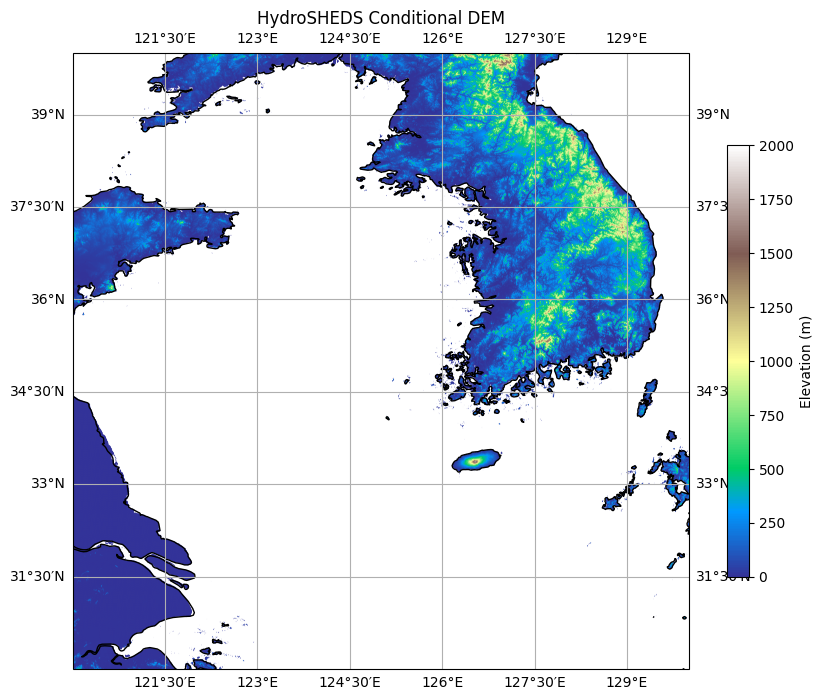

In [152]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.imshow(con_DEM, origin='upper', extent=extent, transform=ccrs.PlateCarree(), cmap='terrain', vmin=0, vmax=2000)

ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Elevation (m)')

ax.set_title('HydroSHEDS Conditional DEM')

plt.show()